<div style='display:flex;'>
    <div style='width:25%;text-align:right;'> <h4 style='color:#9A11DA'>Previous Module:</h4></div>
    <div style='width:25%;text-align:left;'> <h4 ><a href='./05_Qubit_and_quantum_gates.ipynb' style='color:#9A11DA;text-decoration:underline;opacity:0.6;'>5. Qubits and Quantum Gates</a></h4></div>
    <div style='width:25%;text-align:right;'> <h4 style='color:#9A11DA'>Next Module:</h4></div>
    <div style='width:25%;text-align:left;'> <h4 ><a href='./07_Multi_qubit_gates.ipynb' style='color:#9A11DA;text-decoration:underline;opacity:0.6;'>7. Multi-Qubit Gates</a></h4></div>
</div>
<!-- <hr style='border-color:grey;'> -->

<h1 style="color:#D30982;">Summary</h1>

- Representing a quantum circuit
- Coding your first quantum circuit
- Making sense of the output/result of a quantum circuit
- Coding single qubit gates and circuits.

<h1 style="color:#D30982;">Representing Quantum Circuits</h1>

Just like classical circuits, *quantum* circuits are read from left to right. Analogously to a bit in a classical circuit, a *qubit* in a *quantum* circuit is represented by a wire. 

Intuitively, in the case of a classical circuit the wire could be thought of as carrying current. No current flowing through the wire represented the state 0, while current flowing through it represented the state 1. In a quantum circuit, one can intuitively think of the wire as carrying a photon. The convention in quantum computing is that the qubits are always initialized in the state $\left| 0 \right \rangle$.

The quantum information carried by a wire is manipulated by quantum gates, which were introduced in the previous module, and of which you have seen several examples. A single qubit gate is represented by a square inside which we write the name of the quantum gate being applied. e.g the single qubit gates that you learned about in the last module are represented as:

<img src="images/single-qubit-gates.png" width="700" style='margin-left:auto;margin-right:auto;' />
     
We represent a measurement as follows: 

<img src="images/measure.png" width=50 style='margin-left:auto;margin-right:auto;'/>

<h1 style="color:#D30982;">Your First Quantum Program</h1>

In order to write and run quantum programs, we make use of the Python package *qiskit*: this is developed by IBM and lets us build and run quantum circuits on IBM's very own quantum computer.

A very important thing to note is that you can also *simulate* quantum circuits of small enough size on classical computers (recall that performing quantum gates is nothing other than multiplying matrices by and vectors). Such calculations can certainly be performed by a classical computer! The catch is that they very quickly become intractable as the size of the quantum circuits being simulated grows. qiskit also provides a functionality for simulating quantum circuits. For learning purposes, and since we will be dealing mostly with very small quantum circuits, we will be performing a classical simulation of the quantum circuits we build. Running these programs on an actual quantum computer will be as simple as changing one argument in our code. 

Without further ado, let's build our first quantum circuit which does the following: starting from a qubit in the state $\left| 0 \right \rangle$, it creates an equal superposition of $\left| 0 \right \rangle$ and $\left| 1 \right \rangle$, and then measures the qubit. From the content of the last module, you should be able to guess that we can easily achieve this by initializing a qubit in the state $\left| 0 \right \rangle$, and applying a Hadamard gate to it.

Our first step is to import the Python class QuantumCircuit, from the qiskit package. We use this class to describe the quantum circuits we wish to execute, and to execute it.

In [1]:
from qiskit import QuantumCircuit

An object in the `QuantumCircuit` is initialized by specifying a number of qubits for the quantum circuit, and a number of classical bits which will be used to store the outcome of later measurements. In the example below, the first argument '1' to `QuantumCircuit` specifies that we will be using just 1 qubit. The second argument '1' specifies that we will be storing a single classical bit of output from our future measurement.

In [2]:
circ = QuantumCircuit(1,1)  #create QuantumCircuit object
circ.h(0)  #add Hadamard gate to circuit

In the above line, circ is the circuit we just created, and we are inserting the Hadamard gate using `.h(0)`. The '0' in the argument specifies that we want the gate to be applied on the zeroth qubit (recall that numbering in Python starts at 0). At this point, our quantum circuit is ready. We can "draw" it by using the function 'draw'.

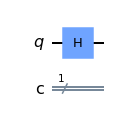

In [3]:
circ.draw(output='mpl') #draw circuit

We encourage you to play with the arguments of the above code snippets! For example, try creating and drawing a circuit with multiple qubits.

So far we have only drawn the quantum circuit. To actually run the circuit and measure requires additional code.  But before we run the circuit, we need to add a measurement command to the circuit. This is done using the function `measure`. The first argument specifies that we are measuring the zeroth qubit, and the second argument specifies that we are storing the output of this measurement in the zeroth output bit.

In [4]:
circ.measure(0,0) #add a measurement to the circuit

Let's look at the drawn version of the circuit one more time and see whether anything just changed.

To actually run the circuit and determine its output, we will make use of two additional modules in qiskit: `Aer` and `execute`. The Aer module contains many simulators. We will be using one called `'qasm_simulator'`. By convention, we refer to the simulator (or the actual quantum computer) as a backend. If you wanted to run your quantum circuit on an actual quantum computer, you would just need to replace `'qasm_simulator'` with the name of the quantum computer.

In [5]:
from qiskit import Aer, execute # Import Aer and execute
backend_sim = Aer.get_backend('qasm_simulator') #create backend object

Once you specify the backend, you can just go ahead and execute the circuit with the function `execute`. The argument `shots` specifies how many times the quantum circuit is run (we'll explain this in more detail soon).

In [6]:
sim = execute(circ, backend_sim, shots=1024) #run the simulation

The results from the execution are stored in 'sim' and can be obtained using the `result` function. From the result object we can get the count of the 0 and 1 outcomes in the 1024 runs we executed.

In [7]:
sim_result = sim.result() #get result object
counts = sim_result.get_counts(circ) #obtain the counts from the result object
print(counts)

{'1': 517, '0': 507}


<h2 style="color:#9A11DA;"> Analyzing Your First Quantum Program</h2>

Looking at the above code, you might be a bit confused by the variables `'shots'` and `'counts'`. We will explain these in a bit more detail.

After applying a sequence of quantum gates to the state $\left| 0 \right\rangle$ (which is the default initial state), the state of the qubit is, in general,

$$\left| \psi \right\rangle=\alpha \left| 0 \right\rangle+ \beta  \left| 1 \right\rangle$$

for some amplitudes $\alpha$ and $\beta$. Recall that the two amplitudes cannot be 'observed' directly. As a classical being, if you want to learn something about what these amplitudes are, you must eventually measure the state. If you do so right away, you will get outcomes $0$ and $1$ with probabilities $|\alpha|^2$ and $|\beta|^2$ respectively.

So, you may ask, how do we ever figure out those $|\alpha|^2$'s and $|\beta|^2$'s? The answer is: by repeating the experiment many times. The 1024 `'shots'` in the program above are instructing the quantum computer (or in this case the simulator) to run the experiment 1024 times. And as you can see, since the state after applying a Hadamard gate is $\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle+\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align}$, then the outcome of the circuit is 0 approximately 50% of the time and 1 approximately 50% of the time. The `'counts'` variable keeps track of all of these outcomes, and allows you to estimate $|\alpha|^2$ and $|\beta|^2$. The higher the number of `'shots'`, the better the estimate! 

We can plot the outcomes stored in the variable 'counts' using the following code:

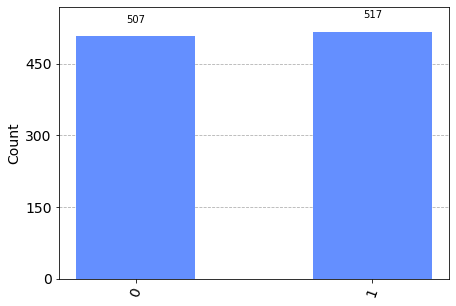

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

<h1 style="color:#D30982;"> Another Quantum Program</h1>
Let's apply an $X$ gate instead of a $H$ gate. So, we start with the $\left| 0 \right\rangle$ state as before, but now we apply $X$ followed by a measurement. Before you run this circuit. Try to predict the resulting 'counts' you would see.

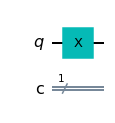

In [9]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,1)
circ.x(0)
circ.draw(output='mpl')

{'1': 1024}


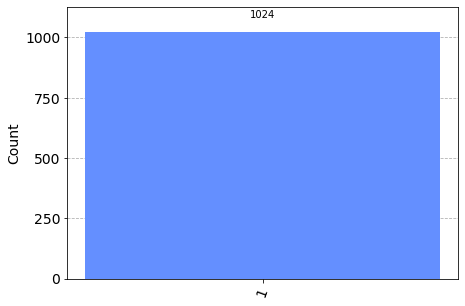

In [10]:
circ.measure([0],[0])
from qiskit import Aer, execute
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

plot_histogram(counts)

<font size=3 color=9A11DA>**Exercise.**</font> Write and run a program that starts with the state $\left| 0 \right\rangle$, applies the following sequence of gates $X$, $H$, $X$, $H$, and then measures. Estimate the probability of obtaining outcome '0'.

In [18]:
from qiskit import QuantumCircuit, Aer, execute
circ=QuantumCircuit(1,1)

#your code here



#execute the circuit
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f40a36cd0a0>"'

<font size=3 color=9A11DA>**Exercise.**</font> Write and run the program that starts with the state $\left| 0 \right\rangle$, applies the following sequence of gates $H$, $Z$, $H$, $Z$, $H$, and then measures. Estimate the probability of obtaining outcome '0'.

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

#your code here




<h2 style="color:#9A11DA;"> Playing With More Circuits</h2>

Single qubit circuits are a nice playground for you to learn and build some intuition for quantum computing. If you play around with these code snippets you might have a few 'Oh wait, I really thought I understood this' moments. We promise you that if each time you have such a moment you spend time straightening out your doubts, you will develop a much more solid understanding of quantum computing. You will also be more prepared to understand even more interesting stuff in the modules to come.

<h1 style="color:#D30982;"> Making Sense of Phases</h1>

If you start with the $\left| 0 \right\rangle$ state and apply an $H$ gate, then the state you get is 

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle+\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align}.$$ 

If you start with $\left| 1 \right\rangle$ and apply an $H$ gate then you get: 

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle-\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align}.$$ 

What is interesting is that, in both cases, if you measure the qubit after applying the $H$ gate, you obtain very similar results. We have run the first circuit earlier. Let's run the second one. 

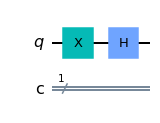

In [19]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,1)
# Flip the initial 0 state to a 1 by applying an X gate
circ.x(0)
# Apply the Hadamard gate.
circ.h(0)
circ.draw(output='mpl')

{'1': 492, '0': 532}


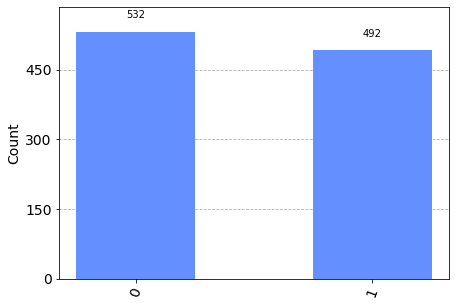

In [20]:
circ.measure([0],[0])
from qiskit import Aer, execute
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

plot_histogram(counts)

As you can see, we get the same distribution of results as from our very first quantum circuit. This should be no surprise, since Born's rule states that the probabilities of obtaining outcomes 0 and 1 are given by squaring the moduli of the amplitudes. In both the cases of

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle+\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align}$$ 

and

$$\begin{align}\left| \psi \right\rangle= \tfrac{1}{\sqrt{2}} \left| 0 \right\rangle-\tfrac{1}{\sqrt{2}} \left| 1 \right\rangle \end{align},$$ 

one clearly obtains probabilites $\frac12$ and $\frac12$ for outcomes 0 and 1, respectively. You might wonder if there is a way we can distinguish the two states. 

We encourage you to think about this question, and to come up with a circuit that distinguishes these two states (before looking below for the answer!)

The answer is that the two states can be distinguished if one first performs additional quantum gates before measuring. The simplest such example is almost trivial: once the two states have been created, one can apply an additional Hadamard gate. So the two circuits are the following:

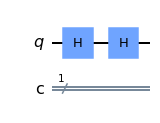

In [21]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,1)
circ.h(0)

#Apply an additional Hadamard gate
circ.h(0)

circ.draw(output='mpl')

{'0': 1024}


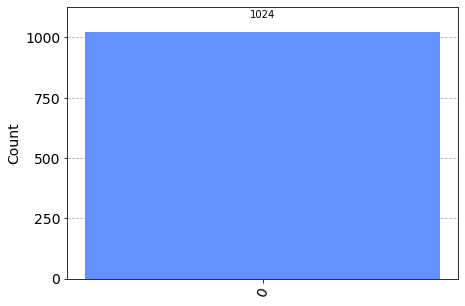

In [22]:
circ.measure([0],[0])
from qiskit import Aer, execute
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

plot_histogram(counts)

Now, we run the same circuit but starting from a qubit in the state $\left| 1\right\rangle$.

In [ ]:
from qiskit import QuantumCircuit
circ = QuantumCircuit(1,1)
circ.x(0) # prepare a qubit in the state |1>
circ.h(0)

#Apply an additional Hadamard gate
circ.h(0)

circ.draw(output='mpl')

In [ ]:
circ.measure([0],[0])
from qiskit import Aer, execute
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

plot_histogram(counts)

As you can see, the first circuit returns outcome 0 with certainty, while the second circuit returns outcome 1 with certainty. In other words, the two states above can be distinguished by applying a Hadamard gate, and then measuring. If you think a bit more about what is going on here, you will realize that the reason behind this is pretty clear. By applying a second Hadamard gate in the two circuits above, we are 'cancelling' the first Hadamard gate (because $H \cdot H$ equals the identity gate). Hence the first circuit is equivalent to an identity gate starting from $\left| 0\right\rangle$ (followed by a measurement), while the second is equivalent to an identity gate applied to $\left|1\right\rangle$, followed by a measurement. The first circuit obviously returns outcome 0 with certainty. The second circuit, returns outcome 1 with certainty.

If you are interested in a less 'trivial' example to distinguish the two states above, we encourage you to play with the gates that you have encountered in the previous module. 

Spoiler alert: it turns out that *most* gates will succeed at distinguishing the two states with significant statistical confidence!

<font size=3 color=9A11DA>**Exercise.**</font> So far, we have dealt with quantum circuits that only contain one qubit. Just to get our feet wet, let's look at a circuit with two qubits. Suppose we initialize two qubits, both in the state $\left|0\right>$, apply a Hadamard ($H$) gate to both qubits, and then measure both qubits. An example of this circuit is shown below. What are the possible outcomes of measuring both qubits? How likely are each of these outcomes? Run the code snippet below, which simulates this circuit below and observe the results. Did the answer match your predictions? (Hint: consider the measurement outcomes of each qubit individually first, and then consider the joint system. For two independent events with respective probabilities $p_1$ and $p_2$, the probability of both events occuring is $p_1 p_2$.)

<img src="images/module_6_quantum_circuit.png" height="150" width="200" align="center"/>

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

#create circuit and add gates
circ=QuantumCircuit(2,2)
circ.h(0)
circ.h(1)

#measure
circ.measure([0,1],[1,0])

backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

plot_histogram(counts)

As you can see, starting with two qubits and acting on them independently yields independent statistics, as you might have expected. In the next module, we will explore circuits of multiple qubits in much more detail. As you will see, the complexity and beauty of quantum computing emerges when we act on multiple qubits in such a way as to *entangle* or *correlate* them.

<h2 style="color:#D30982;">Visualizing Single-Qubit States and Relative Phases</h2>

To further understand how relative phases can be understood, let's make use of a built-in qiskit function that plots single-qubit states on the Bloch Sphere. The Bloch Sphere allows us to represent any single-qubit state on the surface of a sphere parametrized by the angles $\theta$ and $\phi$. This is due to the fact that any single-qubit state can be written in the form $|\psi \rangle = \cos \frac{\theta}{2} |0\rangle + e^{i \phi} \sin \frac{\theta}{2} |1\rangle$.

Let's first initialize the single-qubit circuit and visual the state. Remember that the qubit is, by convention, always initialized in the $|0\rangle$ state.


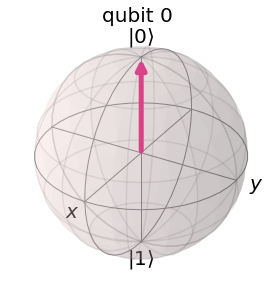

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector

circ = QuantumCircuit(1,1)

sim_statevector = Aer.get_backend('aer_simulator_statevector') #we use a different simulator that keeps track of the full state vector
job_statevector = sim_statevector.run(circ, shots=1)  #a single shot is all we need since we aren't actually measuring the state

backend = Aer.get_backend('statevector_simulator')   #a different backend than the qasm_simulator that gives the statevector
job = execute(circ, backend=backend, shots=1, memory=True)
job_result = job.result()


plot_bloch_multivector(job_result.get_statevector(circ))

We see the single-qubit state $|0\rangle$ is a vector pointing straight up on the Bloch sphere. What happens if we apply an X-gate?

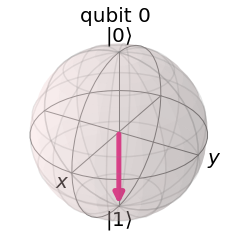

In [2]:
from qiskit import QuantumCircuit
from qiskit.tools.visualization import plot_bloch_multivector, plot_bloch_vector
circ = QuantumCircuit(1,1)
circ.x(0)

from qiskit import Aer, execute
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=1)

backend = Aer.get_backend('statevector_simulator')   #a different backend than the qasm_simulator that gives the statevector
job = execute(circ, backend=backend, shots=1, memory=True)
job_result = job.result()


plot_bloch_multivector(job_result.get_statevector(circ))

Recall the Hadamard gate applied to the $|0\rangle$ or $|1\rangle$ state results in a state in an equal superposition the two basis states with a relative phase of $+1$ or $-1$. How will these appear differently when we plot them on the Bloch sphere?

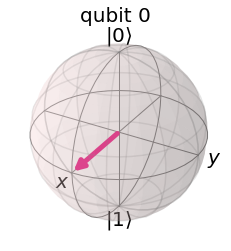

In [3]:
from qiskit import QuantumCircuit
from qiskit.tools.visualization import plot_bloch_multivector, plot_bloch_vector
circ = QuantumCircuit(1,1)
circ.h(0)

from qiskit import Aer, execute
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=1)

backend = Aer.get_backend('statevector_simulator')   #a different backend than the qasm_simulator that gives the statevector
job = execute(circ, backend=backend, shots=1, memory=True)
job_result = job.result()


plot_bloch_multivector(job_result.get_statevector(circ))

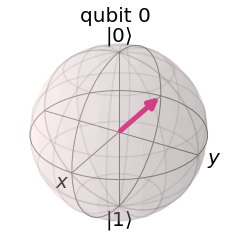

In [4]:
from qiskit import QuantumCircuit
from qiskit.tools.visualization import plot_bloch_multivector, plot_bloch_vector
circ = QuantumCircuit(1,1)
circ.x(0)
circ.h(0)

from qiskit import Aer, execute
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=1)

backend = Aer.get_backend('statevector_simulator')   #a different backend than the qasm_simulator that gives the statevector
job = execute(circ, backend=backend, shots=1, memory=True)
job_result = job.result()

plot_bloch_multivector(job_result.get_statevector(circ))


<h1 style="color:#D30982;">Schrodinger's Cat</h1>

As you build more intuition, we would like you to sometimes pause and reflect deeply about the understanding you are developing. For example, there is a good chance that you have heard of *Schrodinger's cat*, a famous thought experiment proposed by Erwin Schrodinger during the early development <!-- 192694292013 -->of quantum theory. At this time, scientists were just beginning to discover the strange and counterintuitive concepts behind the quantum world. They often used thought experiments to investigate and explain these surprising ideas. In this thought experiment, a cat is put in a box, and there is a mechanism to kill it (why would someone do that? It baffles us too!). That mechanism is triggered by the decay of a radioactive atom. Now, the state of a radioactive atom is in superposition of having decayed and not decayed. This is just like the state of the qubit, where 0 could represent 'not decay' and 1 could represent 'decay'. Does this mean that the cat is in a superposition of being 'dead' and 'alive'?

You see, even with single qubits, you can think of some 'interesting' experiments, if you just figure out a way to couple the output from a qubit's measurement to some macroscopic event.

<img src="images/schrodinger_cat.png" height="200" width="450" style='margin-left:auto;margin-right:auto;'/>

<h1 style="color:#D30982;">Review</h1>

The python package `qiskit` allows us to simulate quantum computers in python. Running a (simulation of) a quantum circuit requires the following steps:
- Import the necessary objects, including `QuantumCircuit`, `Aer`, and `execute`
- Create a `QuantumCircuit` object, specifying a number of qubits and a number of classical bits (to store future measurement outcomes)
- Add gates to the circuit
- Add a measurement
- Create a backend object that will execute the simulation
- Execute the circuit using the backend object
- Manipulate the outcome of the simulation to present it as desired (for example using histogram plots).

<h1 style="color:#D30982;">Exercises</h1>

In [1]:
from qbraid_quiz_widget import MultipleChoiceQuestion
MultipleChoiceQuestion('qubes_m6_writing_quantum_program_1')

MultipleChoiceQuestion(jupyterhub_username='mannythemann40@gmail.com', resource_id='qubes_m6_writing_quantum_p…

In [3]:
from qbraid_quiz_widget import MultipleChoiceQuestion
MultipleChoiceQuestion('qubes_m6_writing_quantum_program_2')

MultipleChoiceQuestion(jupyterhub_username='mannythemann40@gmail.com', resource_id='qubes_m6_writing_quantum_p…

In [2]:
from qbraid_quiz_widget import MultipleChoiceQuestion
MultipleChoiceQuestion('qubes_m6_writing_quantum_program_3')

MultipleChoiceQuestion(jupyterhub_username='mannythemann40@gmail.com', resource_id='qubes_m6_writing_quantum_p…

In [4]:
from qbraid_quiz_widget import MultipleChoiceQuestion
MultipleChoiceQuestion('qubes_m6_writing_quantum_program_4')

MultipleChoiceQuestion(jupyterhub_username='mannythemann40@gmail.com', resource_id='qubes_m6_writing_quantum_p…

<h2 style="color:#9A11DA;">Free Response</h2> 

1. What's wrong with this code?

In [ ]:
circ = QuantumCircuit(0) 

2. To write quantum programs, we made use of the `QuantumCircuit` class from the module `qiskit`. To use this code, we imported it as `from qiskit import QuantumCircuit`. Suppose isntead that we used the statement `import qiskit`, exactly the way we said `import numpy`. How, then could we create an instance of the `QuantumCircuit` class? Write a simple `QuantumCircuit` using this method, and draw it to verify your code works. (Hint: You can look back at how we used `numpy` for guidance?)

In [ ]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1,1)

3. Create a `QuantumCircuit` with three qubits. Use a `for` loop to add a Hadamard to each gate. Draw the circuit to demonstrate that your code has worked correctly.

4. Initialize a `QuantumCircuit` and apply an X and Y gate on the first qubit. Now draw the circuit to verify your code works as expected.

5. One important skill in using external packages is reading coding documentation. This is all the information about how to use various pieces of code for a module. Go to [https://qiskit.org/documentation/](https://qiskit.org/documentation/) and click on "Circuits" and then "Summary of Quantum Operations". This shows all the different possible gates that can be used and how they work mathematically. Scroll down until you find the $T$ gate. How is this gate called using `qiskit`? (Note: Scrolling through documentation can be an extremely confusing process, especially for large modules. Remember that this process is like looking something up in the dictionary: you will come across many words you don't know until you find the one you are looking for!)

<h1 style="color:#D30982;">Challenge Problems</h1> 

1. Consider the firework thought experiment described in the last section of Module 5. Recall that there were three cases:

- 1: The box is empty.
- 2: The firework explodes upon being hit by the photon.
- 3: The firework "chooses" the the upper path, leaving the firework unexploded.

<img src="images/evb_image_2.png" height="350" width="400" style='margin-left:auto;margin-right:auto;'/>

Using Python, create a circuit that simulates each of these scenarios. Do the measurement counts correspond with the physical outcomes described in Module 5?

You may assume the following:
- The photon is a single qubit.
- The beam splitter acts as a Hadamard ($H$) gate.
- The "up-then-right" path may be considered the $\left| 0 \right>$ state, and the "right-then-up" path may be considered the $\left| 1 \right>$ path.
- The mirrors simply reflect the photons, and have no effect on the state of the qubit.
- The photon hitting detector A corresponds to measuring and obtaining outcome $\left| 0 \right>$, and the photon hitting detector B corresponts to outcome $\left| 1 \right>$.

Recall that when the firework is placed in the lower path, it forces a measurement, causing the photon to collapse to either  $\left| 0 \right>$ or  $\left| 1 \right>$ before it reaches the second beam-splitter. When you simulate scenarios 2 and 3, you should break the simulation into two parts:
- First perform the measurement to determine whether the photon took the higher or lower path.
- Then, manually initialize the post-measurement state based on the outcome of the previous measurement (since qiskit does not keep track of post-measurement states).

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

#create QuantumCircuit
circ=QuantumCircuit(1,1)

#Code for CASE 1



#measure
circ.measure([0],[0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

#create QuantumCircuit
circ=QuantumCircuit(1,1)

#Code for CASE 2



#measure
circ.measure([0],[0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

#create QuantumCircuit
circ=QuantumCircuit(1,1)

#Code for CASE 3



#measure
circ.measure([0],[0])
backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)

2. Let's look at the code below and understand what it is showing us!

{'1': 500, '0': 524}
     ┌─────────┐┌───┐┌─┐
q_0: ┤ RY(π/2) ├┤ Z ├┤M├
     └─────────┘└───┘└╥┘
c: 1/═════════════════╩═
                      0 


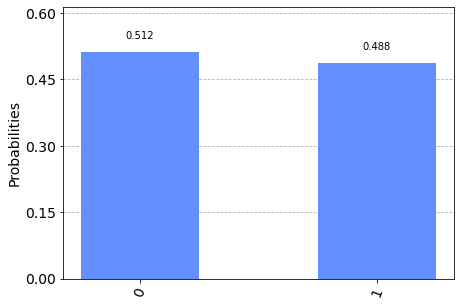

In [41]:
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
circ = QuantumCircuit(1,1)  #create QuantumCircuit object
### START CODE HERE ### (approx. 2 lines)
circ.ry(np.pi/2,0)
circ.z(0)
### END CODE HERE ###
circ.measure(0,0) #add a measurement to the circuit


backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)
print(circ.draw())
plot_histogram(counts)

2. Ignoring the small variance in the results. What are the probabilities for $\ket{0}$ and $\ket{1}$
Answer: 50% for both

3. Write a qubit state which when measured would result in the above probabilites.
Answer: $\tfrac{1}{\sqrt{2}}\ket{0}+\tfrac{1}{\sqrt{2}}\ket{1}$

4. In the below code block, write a single qubit which would produce the same result!

{'0': 1024}
     ┌─┐
q_0: ┤M├
     └╥┘
c: 1/═╩═
      0 


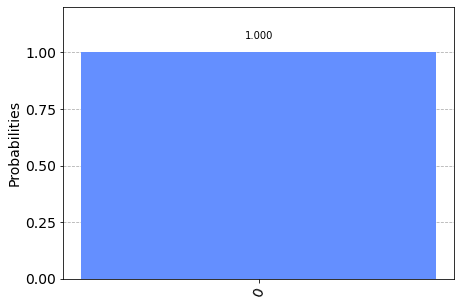

In [42]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1,1)  #create QuantumCircuit object
### START CODE HERE ### (approx. 1 lines)

### END CODE HERE ###
circ.measure(0,0) #add a measurement to the circuit


backend_sim = Aer.get_backend('qasm_simulator')
sim = execute(circ, backend_sim, shots=1024)
sim_result = sim.result()
counts = sim_result.get_counts(circ)
print(counts)
print(circ.draw())
plot_histogram(counts)

Optional: Discuss your results

<hr>
<div style='display:flex;'>
    <div style='width:25%;text-align:right;'> <h4 style='color:#9A11DA'>Previous Module:</h4></div>
    <div style='width:25%;text-align:left;'> <h4 ><a href='./05_Qubit_and_quantum_gates.ipynb' style='color:#9A11DA;text-decoration:underline;opacity:0.6;'>5. Qubits and Quantum Gates</a></h4></div>
    <div style='width:25%;text-align:right;'> <h4 style='color:#9A11DA'>Next Module:</h4></div>
    <div style='width:25%;text-align:left;'> <h4 ><a href='./07_Multi_qubit_gates.ipynb' style='color:#9A11DA;text-decoration:underline;opacity:0.6;'>7. Multi-Qubit Gates</a></h4></div>
</div>
<!-- <hr style='border-color:grey;'> -->